In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# New Section

In [ ]:
pd.set_option('display.max_columns',None)
burnoutdf = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/employee_burnout_analysis-AI.xlsx")

In [ ]:
for i in burnoutdf.columns:
  print(i,burnoutdf[i].dtype)

In [ ]:
burnoutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
burnoutdf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
for i, col in enumerate(burnoutdf.columns):
  print(f"\n\n{burnoutdf[col].unique()}")
  print(f"\n{burnoutdf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [ ]:
burnoutdf.drop(["Employee ID"],axis=1)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
#checking the skewness if the attributes
intfloatoutdf = burnoutdf.select_dtypes([np.int,np.float])
for i, col in enumerate(intfloatoutdf.columns):
  if (intfloatoutdf[col].skew() >= 0.1):
    print("\n",col,"feature is possitively skewed  the value is: ",intfloatoutdf[col].skew() )
  elif (intfloatoutdf[col].skew() <= -0.1):
    print("\n",col,"feature is negetively skewed  the value is: ",intfloatoutdf[col].skew() )
  else:
    print("\n",col,"feature is normal" )



 Designation feature is normal

 Resource Allocation feature is possitively skewed  the value is:  0.20457273454318103

 Mental Fatigue Score feature is negetively skewed  the value is:  -0.4308950578815428

 Burn Rate feature is normal


In [ ]:
#replace null(missing values) with mean
burnoutdf["Resource Allocation"].fillna(burnoutdf["Resource Allocation"].mean(), inplace=True)
burnoutdf["Mental Fatigue Score"].fillna(burnoutdf["Mental Fatigue Score"].mean(), inplace=True)

In [ ]:
burnoutdf = burnoutdf[burnoutdf["Burn Rate"].notna()]

In [ ]:
corr = burnoutdf.corr()
sns.set(rc={"figure.figsize":(14,12)})
fig = px.imshow(corr,text_auto=True,aspect="auto")
fig.show()

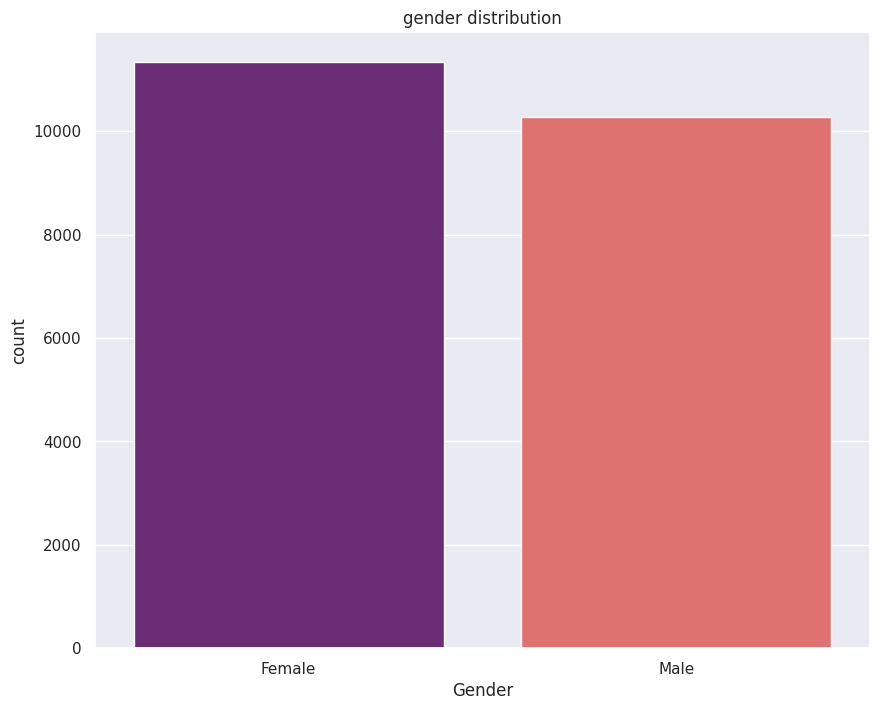

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = "Gender",data=burnoutdf,palette="magma")
plt.title("gender distribution")
plt.show()

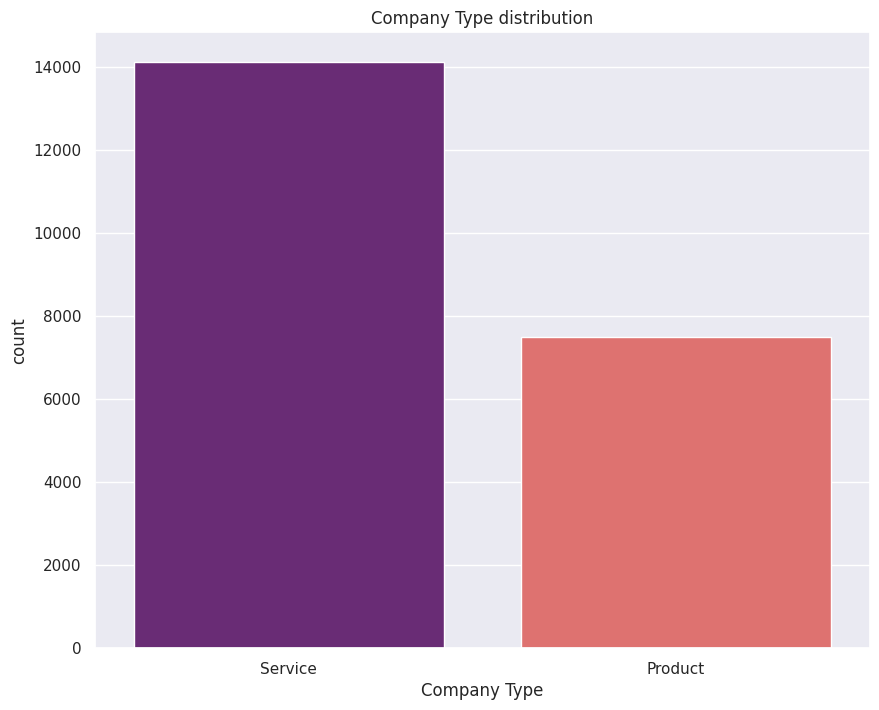

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = "Company Type",data=burnoutdf,palette="magma")
plt.title("Company Type distribution")
plt.show()

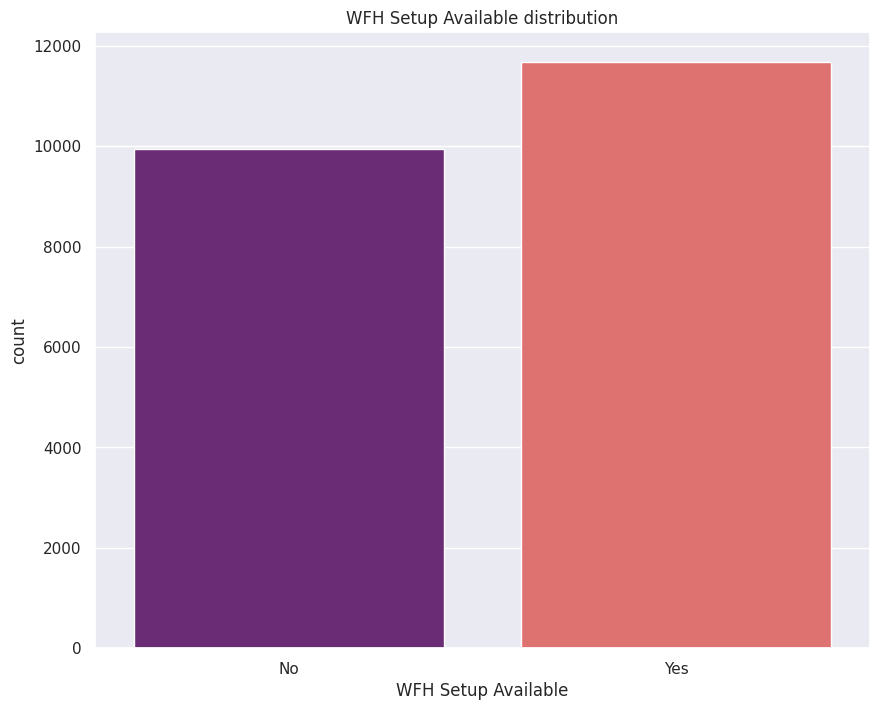

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = "WFH Setup Available",data=burnoutdf,palette="magma")
plt.title("WFH Setup Available distribution")
plt.show()

In [ ]:
burn_st = burnoutdf.loc[:,"Date of Joining":"Burn Rate"]
burn_st = burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
  fig = px.histogram(burn_st, x=col, title="Plot Distribution of "+ col, color_discrete_sequence=["indianred"])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
fig = px.line(burnoutdf, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation", color_discrete_sequence = px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

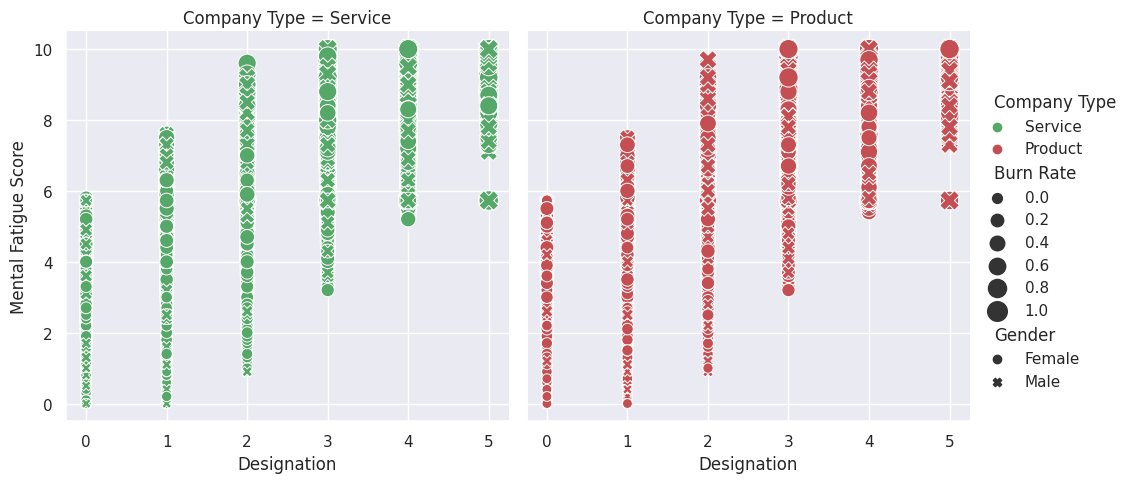

In [ ]:
sns.relplot(
    data=burnoutdf, x="Designation", y = "Mental Fatigue Score", col="Company Type",
    hue = "Company Type", size = "Burn Rate", style="Gender",
    palette = ["g","r"], sizes = (50,200)
)

In [ ]:
from sklearn import preprocessing
label_encode = preprocessing.LabelEncoder()

In [ ]:
burnoutdf["GenderLabel"] = label_encode.fit_transform(burnoutdf["Gender"].values)
burnoutdf["Company_typeLabel"] = label_encode.fit_transform(burnoutdf["Company Type"].values)
burnoutdf["WFH_Setup_AvailableLabel"] = label_encode.fit_transform(burnoutdf["WFH Setup Available"].values)


In [ ]:
gn = burnoutdf.groupby("Gender")
gn = gn["GenderLabel"]
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
wsa = burnoutdf.groupby('WFH Setup Available')
wsa = wsa["WFH_Setup_AvailableLabel"]
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [ ]:
burnoutdf.tail(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_typeLabel,WFH_Setup_AvailableLabel
22739,fffe32003300350034003100,2008-02-06,Male,Service,No,2,5.0,8.500000,0.67,1,1,0
22740,fffe33003300380031003100,2008-09-05,Female,Product,No,3,6.0,7.300000,0.55,0,0,0
22742,fffe33003200310039003000,2008-07-28,Male,Product,No,3,5.0,8.100000,0.69,1,0,0
22743,fffe3300390030003600,2008-12-15,Female,Product,Yes,1,3.0,6.000000,0.48,0,0,1
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.200000,0.54,1,0,0
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,5.728188,0.41,0,1,0
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.700000,0.59,0,0,1
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,5.728188,0.72,1,1,1
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.900000,0.52,0,1,0
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.800000,0.61,1,0,0


In [ ]:
Columns = ["Designation","Resource Allocation","Mental Fatigue Score","GenderLabel","Company_typeLabel", "WFH_Setup_AvailableLabel"]
X = burnoutdf[Columns]
y = burnoutdf["Burn Rate"]

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(X)

print("PCA shape of X is: ", x_pca.shape, "and original shape is: ", X.shape)
print("% of importance of selected feature is: ", pca.explained_variance_ratio_)
print("The number of features selected through PCA is: ", pca.n_components_)

PCA shape of X is:  (21626, 4) and original shape is:  (21626, 6)
% of importance of selected feature is:  [0.78488404 0.11036927 0.03027512 0.02627785]
The number of features selected through PCA is:  4


In [ ]:
from sklearn.model_selection import train_test_split
x_train_pca, x_test, y_train, Y_test = train_test_split(x_pca,y, test_size = 0.25, random_state=10)

In [ ]:
print(x_train_pca.shape, x_test.shape, y_train.shape, Y_test.shape)

(16219, 4) (5407, 4) (16219,) (5407,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_model = RandomForestRegressor()
rf_model.fit(x_train_pca, y_train)

train_pred_rf = rf_model.predict(x_train_pca)
train_r2 = r2_score(y_train, train_pred_rf)
test_pred_rf = rf_model.predict(x_test)
test_r2 = r2_score(Y_test,test_pred_rf)

#accuracy score
print("Accuracy score of train data: "+ str(round(100*train_r2,4))+" %")
print("Accuracy score of test data: "+ str(round(100*test_r2,4))+" %")

Accuracy score of train data: 93.8503 %
Accuracy score of test data: 89.2706 %


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_model.fit(x_train_pca, y_train)

train_pred_adaboost = abr_model.predict(x_train_pca)
train_r2 = r2_score(y_train, train_pred_adaboost)
test_pred_adaboost = abr_model.predict(x_test)
test_r2 = r2_score(Y_test,test_pred_adaboost)

#accuracy score
print("Accuracy score of train data: "+ str(round(100*train_r2,4))+" %")
print("Accuracy score of test data: "+ str(round(100*test_r2,4))+" %")

Accuracy score of train data: 81.969 %
Accuracy score of test data: 81.4424 %


In [ ]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train_pca, y_train)

train_pred_rf = rf_model.predict(x_train_pca)
train_r2 = r2_score(y_train, train_pred_rf)
test_pred_rf = rf_model.predict(x_test)
test_r2 = r2_score(Y_test,test_pred_rf)

#accuracy score
print("Accuracy score of train data: "+ str(round(100*train_r2,4))+" %")
print("Accuracy score of test data: "+ str(round(100*test_r2,4))+" %")

Accuracy score of train data: 93.8524 %
Accuracy score of test data: 89.2713 %


In [ ]:
burnoutdf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'GenderLabel', 'Company_typeLabel',
       'WFH_Setup_AvailableLabel'],
      dtype='object')

In [ ]:
print(xtest, train_pred_rf)

3956     0.26
6845     0.47
5647     0.53
680      0.69
18106    0.33
         ... 
9838     0.58
7639     0.29
18662    0.75
7641     0.35
18605    0.42
Name: Burn Rate, Length: 16219, dtype: float64 [0.27063667 0.47673762 0.55929655 ... 0.76159167 0.39689719 0.3906474 ]


In [ ]:
x_test

array([[ 1.7563744 , -0.86345681,  0.52632262, -0.31084195],
       [-2.50130336,  0.14751472, -0.20642682, -0.60031168],
       [ 3.61203752,  0.40425929,  0.257509  ,  0.69676068],
       ...,
       [-5.67011127,  0.60364063, -0.25025158, -0.46532991],
       [ 0.19958456,  1.17668613,  0.19402132,  0.84233865],
       [-0.3471434 ,  1.09124673, -0.66380686,  0.65153424]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train_pca, x_test, y_train, Y_test = train_test_split(X,y, test_size = 0.25, random_state=10)